In [3]:
#imprting all the required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import seaborn as sns
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet 

In [9]:
# Get the "AAPL" stock data
ticker = yf.Ticker("AAPL")
end=datetime.now()
start = datetime(end.year-7,end.month,end.day)
# Get the OHLC data for the past 7 years in 1 day intervals
ohlc = ticker.history(period="1d", interval="1D", start=start, end=end)
aapl = pd.DataFrame(ohlc)

In [10]:
aapl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-02-17 00:00:00-05:00,22.211048,22.564881,22.091572,22.544203,179452800,0.0,0.0
2016-02-18 00:00:00-05:00,22.709637,22.721126,22.077793,22.116854,156084000,0.0,0.0
2016-02-19 00:00:00-05:00,22.057105,22.231724,22.011153,22.066296,141496800,0.0,0.0
2016-02-22 00:00:00-05:00,22.128332,22.263893,22.038726,22.259296,137123200,0.0,0.0
2016-02-23 00:00:00-05:00,22.149009,22.171985,21.723950,21.756117,127770400,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-13 00:00:00-05:00,150.949997,154.259995,150.919998,153.850006,62199000,0.0,0.0
2023-02-14 00:00:00-05:00,152.119995,153.770004,150.860001,153.199997,61707600,0.0,0.0
2023-02-15 00:00:00-05:00,153.110001,155.500000,152.880005,155.330002,65669300,0.0,0.0


In [11]:
#reseting the index of the dataframe
aapl = aapl.reset_index()

In [15]:
#changing the data type of date colume to match Propher model requirements
aapl['Date'] = aapl['Date'].dt.tz_localize(None)

In [16]:
#checking the data types for all columns
aapl.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends              float64
Stock Splits           float64
dtype: object

In [17]:
aapl['ds'] = aapl['ds'].dt.strftime("%Y-%m-%d")


KeyError: 'ds'

In [71]:
spy

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2016-02-01,25.177860,25.505698,25.112292,25.259819,19015100,0.00,0.0
1,2016-02-02,24.956576,24.989358,24.284509,24.423840,24994300,0.00,0.0
2,2016-02-03,24.572658,24.572658,23.580492,24.258472,44660100,0.26,0.0
3,2016-02-04,24.093114,24.704950,24.068311,24.614002,29257800,0.00,0.0
4,2016-02-05,24.456907,24.605733,23.902948,24.010433,27957500,0.00,0.0
...,...,...,...,...,...,...,...,...
1757,2023-01-24,29.940001,30.190001,29.730000,29.920000,24855100,0.00,0.0
1758,2023-01-25,29.520000,29.889999,29.170000,29.700001,28268000,0.00,0.0
1759,2023-01-26,30.059999,30.110001,29.330000,30.090000,56088100,0.00,0.0
1760,2023-01-27,27.070000,28.240000,26.780001,28.160000,148424600,0.00,0.0


In [19]:
split_date = 1589
aapl_train = aapl.loc[aapl.index <= split_date].copy()
aapl_test = aapl.loc[aapl.index > split_date].copy()



In [20]:
aapl_train_prophet = aapl_train.reset_index().rename(columns={'Date':'ds','Close':'y'})

In [21]:
aapl = aapl.reset_index().rename(columns={'Date':'ds','Close':'y'})

In [22]:
aapl_train

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2016-02-17,22.211048,22.564881,22.091572,22.544203,179452800,0.0,0.0
1,2016-02-18,22.709637,22.721126,22.077793,22.116854,156084000,0.0,0.0
2,2016-02-19,22.057105,22.231724,22.011153,22.066296,141496800,0.0,0.0
3,2016-02-22,22.128332,22.263893,22.038726,22.259296,137123200,0.0,0.0
4,2016-02-23,22.149009,22.171985,21.723950,21.756117,127770400,0.0,0.0
...,...,...,...,...,...,...,...,...
1585,2022-06-02,147.155781,150.580094,146.190204,150.520370,72348100,0.0,0.0
1586,2022-06-03,146.230006,147.295133,143.801147,144.716949,88570300,0.0,0.0
1587,2022-06-06,146.359420,147.892405,144.239130,145.473480,71598400,0.0,0.0
1588,2022-06-07,143.691653,148.320439,143.442794,148.031769,67808200,0.0,0.0


In [23]:
aapl_test

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1590,2022-06-09,146.409209,147.275236,141.879957,141.989456,69473000,0.0,0.0
1591,2022-06-10,139.640205,140.118011,136.434890,136.504578,91437900,0.0,0.0
1592,2022-06-13,132.264009,134.583384,130.840538,131.278534,122207100,0.0,0.0
1593,2022-06-14,132.522833,133.279362,130.880349,132.154510,84784300,0.0,0.0
1594,2022-06-15,133.677517,136.713609,131.557242,134.812317,91533000,0.0,0.0
...,...,...,...,...,...,...,...,...
1760,2023-02-13,150.949997,154.259995,150.919998,153.850006,62199000,0.0,0.0
1761,2023-02-14,152.119995,153.770004,150.860001,153.199997,61707600,0.0,0.0
1762,2023-02-15,153.110001,155.500000,152.880005,155.330002,65669300,0.0,0.0
1763,2023-02-16,153.509995,156.330002,153.350006,153.710007,68167900,0.0,0.0


In [24]:
model = Prophet()
model.fit(aapl)

18:45:10 - cmdstanpy - INFO - Chain [1] start processing
18:45:10 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
aapl_test_prophet = aapl_test.reset_index().rename(columns={'Date':'ds','Close':'y'})
aapl_test_fcst = model.predict(aapl_test_prophet)

In [26]:
aapl_test_fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-09,151.427703,137.780321,154.815757,151.427703,151.427703,-5.142305,-5.142305,-5.142305,-0.064111,-0.064111,-0.064111,-5.078194,-5.078194,-5.078194,0.0,0.0,0.0,146.285398
1,2022-06-10,151.404742,137.350623,155.107927,151.404742,151.404742,-5.304671,-5.304671,-5.304671,-0.174083,-0.174083,-0.174083,-5.130588,-5.130588,-5.130588,0.0,0.0,0.0,146.100070
2,2022-06-13,151.335857,137.195646,154.276021,151.335857,151.335857,-5.164190,-5.164190,-5.164190,0.099787,0.099787,0.099787,-5.263977,-5.263977,-5.263977,0.0,0.0,0.0,146.171667
3,2022-06-14,151.312895,136.867233,153.824607,151.312895,151.312895,-5.231097,-5.231097,-5.231097,0.063895,0.063895,0.063895,-5.294992,-5.294992,-5.294992,0.0,0.0,0.0,146.081799
4,2022-06-15,151.289934,137.632358,154.252089,151.289934,151.289934,-5.239517,-5.239517,-5.239517,0.077099,0.077099,0.077099,-5.316616,-5.316616,-5.316616,0.0,0.0,0.0,146.050416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2023-02-13,145.710270,142.076051,159.030079,145.710270,145.710270,5.123598,5.123598,5.123598,0.099787,0.099787,0.099787,5.023811,5.023811,5.023811,0.0,0.0,0.0,150.833868
171,2023-02-14,145.687308,142.405076,158.691089,145.687308,145.687308,4.915906,4.915906,4.915906,0.063895,0.063895,0.063895,4.852011,4.852011,4.852011,0.0,0.0,0.0,150.603215
172,2023-02-15,145.664347,141.750204,158.524445,145.664347,145.664347,4.723275,4.723275,4.723275,0.077099,0.077099,0.077099,4.646176,4.646176,4.646176,0.0,0.0,0.0,150.387622
173,2023-02-16,145.641385,141.344925,158.887027,145.641385,145.641385,4.344362,4.344362,4.344362,-0.064111,-0.064111,-0.064111,4.408473,4.408473,4.408473,0.0,0.0,0.0,149.985747


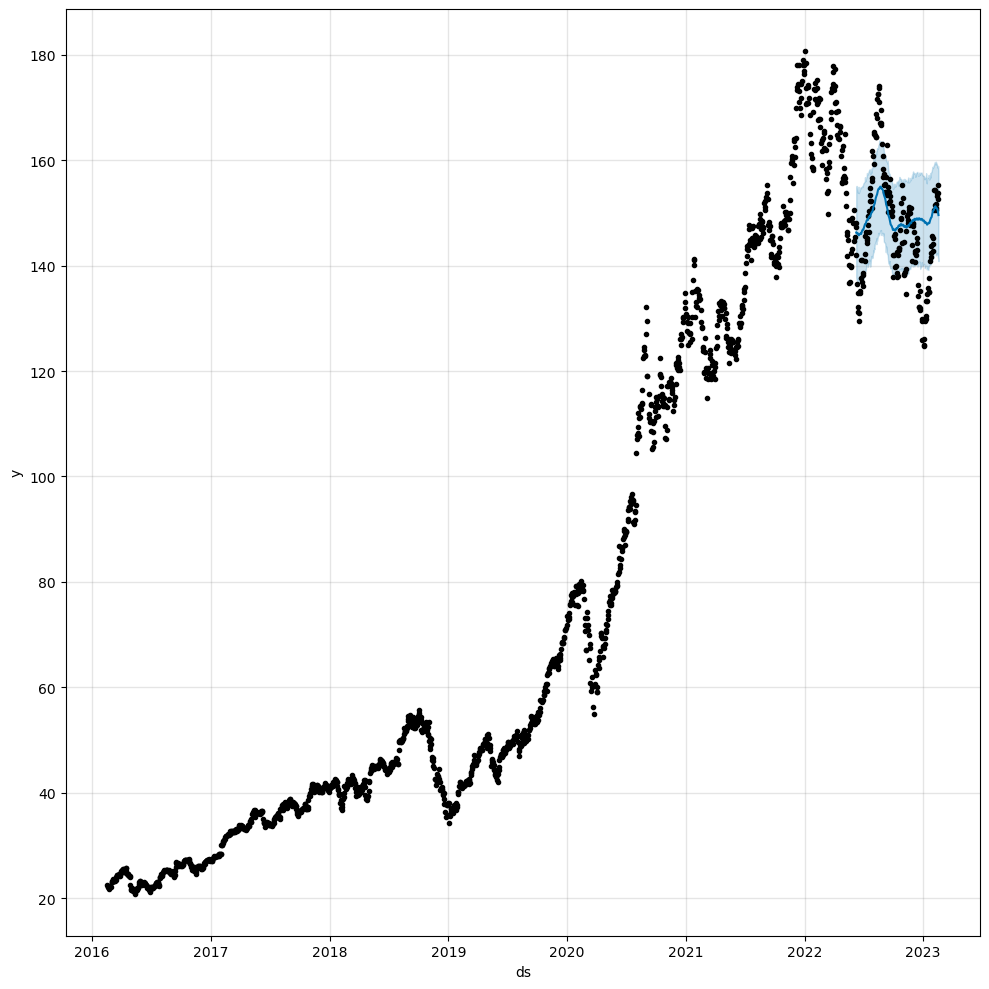

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
fig = model.plot(aapl_test_fcst , ax =ax)
plt.show()

In [28]:
plot_plotly(model,aapl_test_fcst)

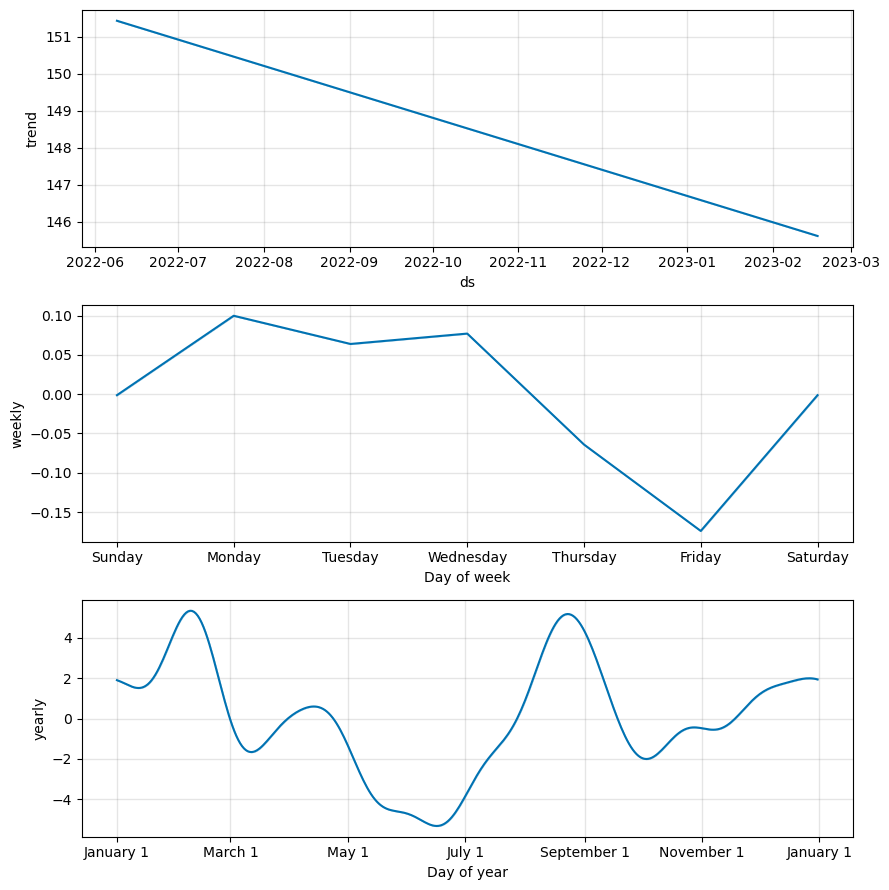

In [29]:
fig = model.plot_components(aapl_test_fcst)
plt.show()

KeyError: 'ds'

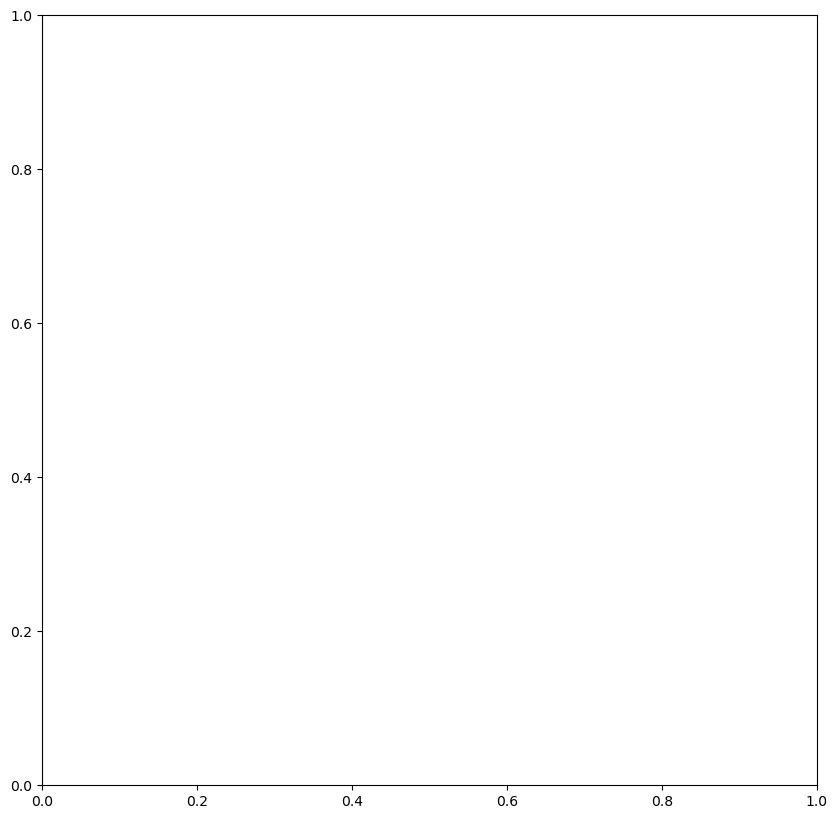

In [83]:
f ,ax = plt.subplots(figsize = (10,10))
ax.scatter(spy_test['ds'], spy_test['y'],color='r')
fig = model.plot(spy_test_fcst , ax=ax)

In [ ]:
future = model.make_future_dataframe(periods =365, freq ='D',include_history=False)
forecast = model.predict(future)

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
360,2024-01-27,25.472639,2.579903,52.096547,4.230105,47.264124,2.512069,2.512069,2.512069,-0.522497,-0.522497,-0.522497,3.034566,3.034566,3.034566,0.0,0.0,0.0,27.984708
361,2024-01-28,25.361043,3.376788,52.547723,4.053441,47.233234,2.525219,2.525219,2.525219,-0.522497,-0.522497,-0.522497,3.047716,3.047716,3.047716,0.0,0.0,0.0,27.886262
362,2024-01-29,25.249446,3.801600,52.551203,3.876776,47.202345,3.429538,3.429538,3.429538,0.341268,0.341268,0.341268,3.088269,3.088269,3.088269,0.0,0.0,0.0,28.678984
363,2024-01-30,25.137850,2.924756,52.932456,3.700112,47.171455,3.439258,3.439258,3.439258,0.286021,0.286021,0.286021,3.153236,3.153236,3.153236,0.0,0.0,0.0,28.577108
364,2024-01-31,25.026254,3.509089,53.233981,3.523447,47.140566,3.498362,3.498362,3.498362,0.259327,0.259327,0.259327,3.239034,3.239034,3.239034,0.0,0.0,0.0,28.524616


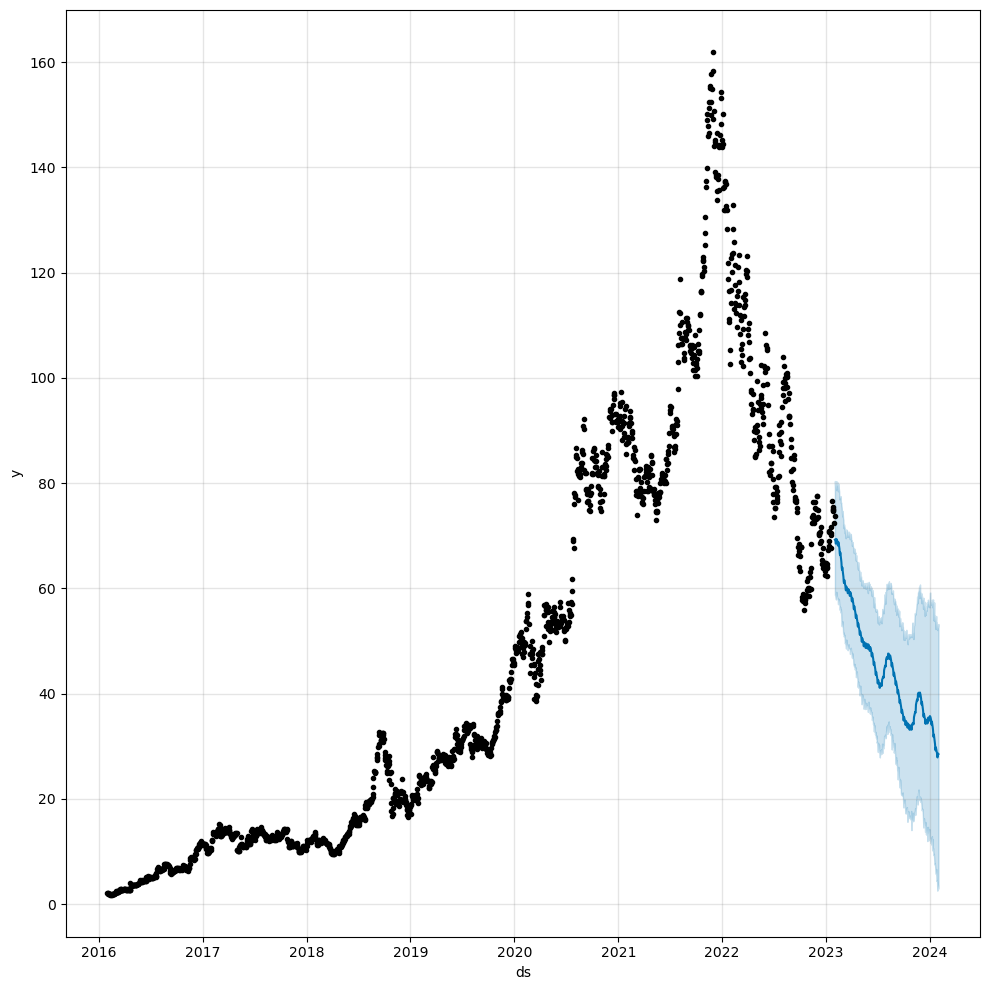

In [ ]:
fi, ax = plt.subplots(figsize=(10,10))
fi = model.plot(forecast , ax =ax)
plt.show()

In [ ]:
model = Prophet()
model.fit(spy)

12:00:15 - cmdstanpy - INFO - Chain [1] start processing
12:00:16 - cmdstanpy - INFO - Chain [1] done processing


,ds,Open,High,Low,y,Volume,Dividends,Stock Splits,Capital Gains
0,2003-01-08,62.817533,62.953800,62.034021,62.265667,38702200,0.0,0.0,0.0
1,2003-01-09,62.558696,63.485290,62.279358,63.233200,34804900,0.0,0.0,0.0
2,2003-01-10,62.647239,63.798669,62.545046,63.403503,37768900,0.0,0.0,0.0
3,2003-01-13,63.730523,63.948545,62.981074,63.383049,31649900,0.0,0.0,0.0
4,2003-01-14,63.151416,63.928119,62.960648,63.587460,30733000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5030,2022-12-30,380.640015,382.579987,378.429993,382.429993,83975100,0.0,0.0,0.0
5031,2023-01-03,384.369995,386.429993,377.829987,380.820007,74850700,0.0,0.0,0.0
5032,2023-01-04,383.179993,385.880005,380.000000,383.760010,85934100,0.0,0.0,0.0
5033,2023-01-05,381.720001,381.839996,378.760010,379.380005,76970500,0.0,0.0,0.0


In [ ]:
spy2 = spy.rename(columns={'Date':'ds'
                        ,'Close':'y'
                        })

In [ ]:
spy2.head()


,ds,Open,High,Low,y,Volume,Dividends,Stock Splits
0,2003-01-08,10.190399,10.267553,9.846169,9.899584,55719700,0.0,0.0
1,2003-01-09,10.018279,10.315029,10.006410,10.125110,58692700,0.0,0.0
2,2003-01-10,10.113248,10.386258,10.006418,10.338778,54995200,0.0,0.0
3,2003-01-13,10.593982,10.671136,10.226011,10.315036,66865000,0.0,0.0
4,2003-01-14,10.421864,10.588044,10.291294,10.558370,80562500,0.0,0.0


In [ ]:
model = Prophet()
model.fit(spy)

19:40:02 - cmdstanpy - INFO - Chain [1] start processing
19:40:04 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods =365, freq ='D',include_history=False)
forecast = model.predict(future)

In [ ]:
plot_plotly(model,forecast)